# Retail Demand Prediction (Time Series Forecasting)

# Goal: Build a machine learning model to predict future sales based on historical data.

## Setup


In [ ]:
from dotenv import load_dotenv
import os

load_dotenv('/content/drive/My Drive/path_to_your_env_file/.env')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File loaded successfully.
Dates parsed successfully.
  product_id store_id       date  sales  revenue  stock  price promo_type_1  \
0      P0001    S0002 2017-02-01    0.0     0.00    8.0   6.25         PR14   
1      P0001    S0012 2017-02-01    1.0     5.30    0.0   6.25         PR14   
2      P0001    S0013 2017-02-01    2.0    10.59    0.0   6.25         PR14   
3      P0001    S0023 2017-02-01    0.0     0.00    6.0   6.25         PR14   
4      P0001    S0025 2017-02-01    0.0     0.00    1.0   6.25         PR14   

  promo_bin_1 promo_type_2  promo_bin_2  promo_discount_2  \
0         NaN         PR03          NaN               NaN   
1         NaN         PR03          NaN               NaN   
2         NaN         PR03          NaN               NaN   
3         NaN         PR03          NaN               NaN   
4         NaN         PR03          Na

<ipython-input-5-1fca918a02be>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

## Training

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5qnpwlwa/0nxeyqj0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5qnpwlwa/2r4c2h83.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23630', 'data', 'file=/tmp/tmp5qnpwlwa/0nxeyqj0.json', 'init=/tmp/tmp5qnpwlwa/2r4c2h83.json', 'output', 'file=/tmp/tmp5qnpwlwa/prophet_modelt1hs5pis/prophet_model-20250303175607.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:56:07 - cmdstanpy - INFO - Chain [1] start processing
IN

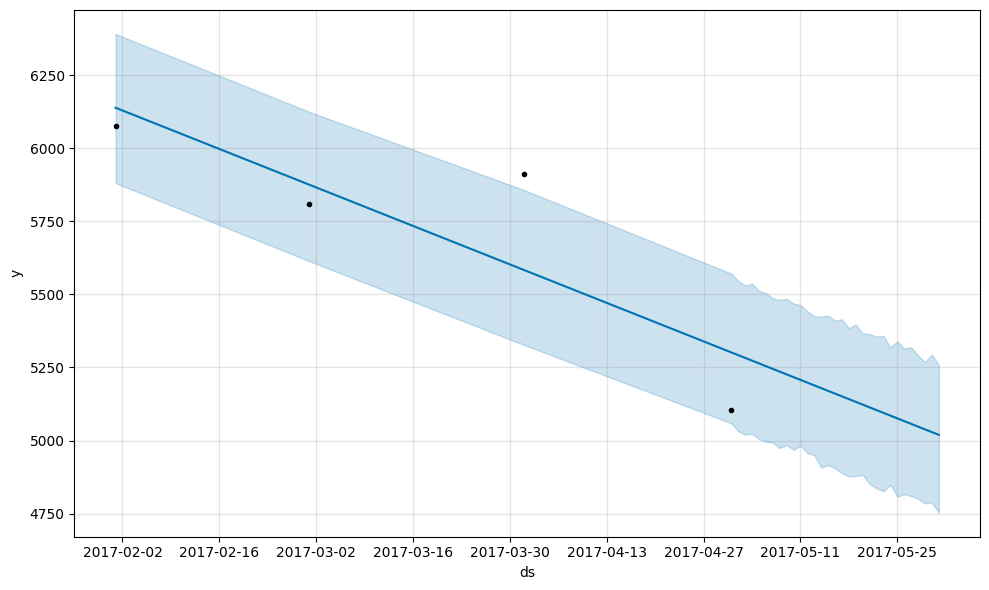

In [ ]:
sales_df = df
sales_df = sales_df.groupby("date")["sales"].sum().reset_index()
sales_df = sales_df.rename(columns={"date": "ds", "sales": "y"})

model = Prophet()
model.fit(sales_df)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

forecast.to_csv("redacted", index=False)

fig = model.plot(forecast)
plt.savefig("forecast_chart.png")
plt.show()
